## WR schannel boost

In [ ]:
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-3000_MN-1300_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-3000_MN-1300_13p6TeV_0.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()

lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()
lhe_mass = events["LHEPart_mass"].array()
genpdgid = events["GenPart_pdgId"].array()
genpt = events["GenPart_pt"].array()
geneta = events["GenPart_eta"].array()
genphi = events["GenPart_phi"].array()
genmass = events["GenPart_mass"].array()
wr_mask = (genpdgid == 34)

wr_pt = genpt[wr_mask]
wr_eta = geneta[wr_mask]
wr_phi = genphi[wr_mask]
wr_mass = genmass[wr_mask]

wr_E = np.sqrt(wr_pt**2 * np.cosh(wr_eta)**2 + wr_mass**2)
gamma = wr_E / wr_mass
gammafactor= ak.flatten(gamma)
print("Gamma factor of WR:", gammafactor)
plt.hist(ak.to_numpy(gammafactor), bins=1000, range=(1, 10), histtype='step', label='Gamma factor of WR')



500
Muon pt ratio : [1.53, 3.35, 2.79, 3.89, 1.58, 0.429, ..., 3.01, 0.471, 1.01, 1.62, 0.379]
Bottom pt ratio : [1.06e+03, 2.22, -187, 904, 103, 810, 283, ..., 425, 707, 903, -112, -105, -201]
Muon n mother pt : [44.8, 55.4, 55.5, 74.9, 80.3, ..., 2.22e+03, 2.26e+03, 2.31e+03, 2.47e+03]
Muon WR mother pt : [170, 173, 258, 273, 274, ..., 2.07e+03, 2.11e+03, 2.13e+03, 2.5e+03, 2.94e+03]


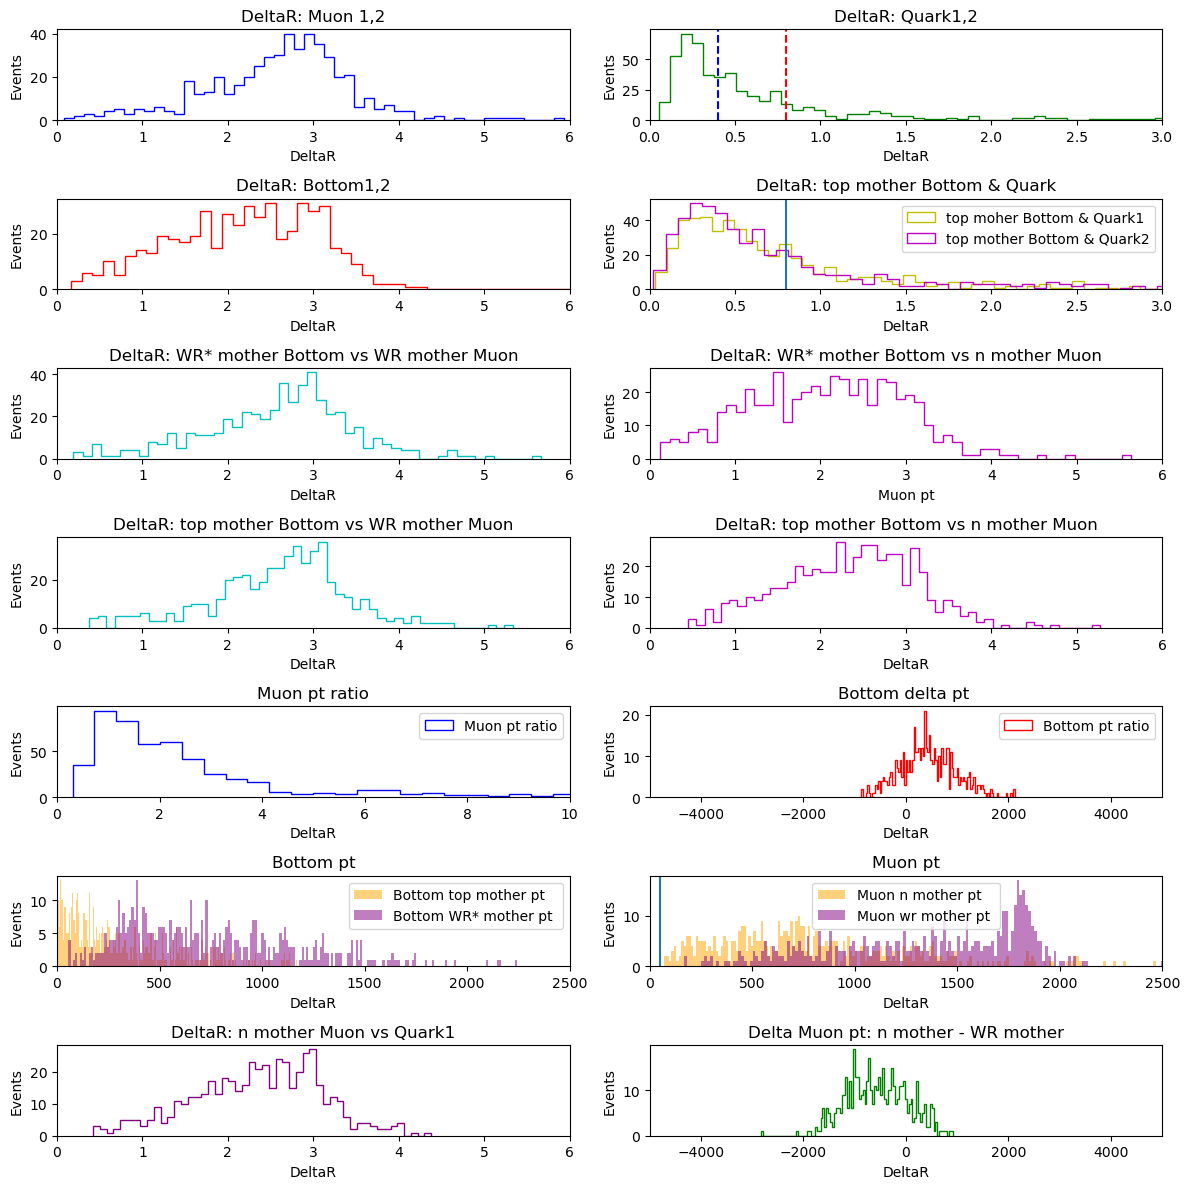

In [3]:
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

sample = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()


lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()
lhe_mass = events["LHEPart_mass"].array()
lhe_status = events["LHEPart_status"].array()


#muon case
## WL b delta r 
muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)
electron_mask = (lhe_pdgid == 11) | (lhe_pdgid == -11)
WL_mask = (lhe_pdgid == 24) | (lhe_pdgid == -24)
bottom_mask = (lhe_pdgid == 5) | (lhe_pdgid == -5)
quark_mask = ((abs(lhe_pdgid) == 1) | (abs(lhe_pdgid) == 2) | (abs(lhe_pdgid) == 3) | (abs(lhe_pdgid) == 4))& (lhe_status == 1)

muon_eta = lhe_eta[muon_mask]
muon_phi = lhe_phi[muon_mask]
muon_pt = lhe_pt[muon_mask]
print(len(lhe_pdgid))
WL_eta = lhe_eta[WL_mask]
WL_phi = lhe_phi[WL_mask]

bottom_eta = lhe_eta[bottom_mask]
bottom_phi = lhe_phi[bottom_mask]
bottom_pt = lhe_pt[bottom_mask]

quark_eta = lhe_eta[quark_mask]
quark_phi = lhe_phi[quark_mask]
quark_pt = lhe_pt[quark_mask]

eta = np.zeros_like(WL_eta)
phi = np.zeros_like(WL_phi)
deltar = np.zeros_like(WL_eta)


###delta r function
# delta_r 함수 수정

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(eta1, phi1, eta2, phi2):
    d_eta = eta1 - eta2
    d_phi = delta_phi(phi1, phi2)
    return np.sqrt(d_eta**2 + d_phi**2)

#lepton , muon 1 = WR mother
#lepton , muon 2 = n mother
#bottom quark 1 = WR* mother
#bottom quark 2 = t mother  

lepton12_deltar = delta_r(muon_eta[:,0], muon_phi[:,0], muon_eta[:,1], muon_phi[:,1])
twoquark_deltar = delta_r(quark_eta[:,0], quark_phi[:,0], quark_eta[:,1], quark_phi[:,1])
bottomquark_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], bottom_eta[:,1], bottom_phi[:,1])
bottomandquark1_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], quark_eta[:,0], quark_phi[:,0])
bottomandquark2_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], quark_eta[:,1], quark_phi[:,1])
WRbottom_WRlepton_deltar = delta_r(bottom_eta[:,1], bottom_phi[:,1], muon_eta[:,1], muon_phi[:,1])
WRbottom_Nlepton_deltar = delta_r(bottom_eta[:,1], bottom_phi[:,1], muon_eta[:,0], muon_phi[:,0])
Topbottom_WRlepton_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], muon_eta[:,1], muon_phi[:,1])
Topbottom_Nlepton_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], muon_eta[:,0], muon_phi[:,0])
nlepton_quark_deltar = delta_r(muon_eta[:,0], muon_phi[:,0], quark_eta[:,0], quark_phi[:,0])

muonpt1 = muon_pt[:, 0]#muon 0 =  n mother
muonpt2 = muon_pt[:, 1]# muon 1 = WR mother
bottompt1 = bottom_pt[:, 0]#bottom quark 0 = top mother
bottompt2 = bottom_pt[:, 1]#bottom quark 1 = WR* mother
a=np.sort(muonpt1)
b=np.sort(muonpt2)
muonptratio = muonpt2 / muonpt1
delatmuonpt = muonpt1 - muonpt2
bottomptratio = bottompt2 - bottompt1
print("Muon pt ratio :", muonptratio)
print("Bottom pt ratio :", bottomptratio)
print("Muon n mother pt :", a)
print("Muon WR mother pt :", b)


fig, axs = plt.subplots(7, 2, figsize=(12, 12))

axs[0, 0].hist(ak.to_numpy(lepton12_deltar), bins=50, histtype='step', color='b')
axs[0, 0].set_title('DeltaR: Muon 1,2')
axs[0,0].set_xlim(0, 6)

axs[0, 1].hist(ak.to_numpy(twoquark_deltar), bins=50, histtype='step', color='g')
axs[0, 1].set_title('DeltaR: Quark1,2')
axs[0, 1].axvline(0.4, color='b', linestyle='--')
axs[0, 1].axvline(0.8, color='r', linestyle='--')
axs[0,1].set_xlim(0,3)

axs[1, 0].hist(ak.to_numpy(bottomquark_deltar), bins=50, histtype='step', color='r')
axs[1, 0].set_title('DeltaR: Bottom1,2')
axs[1,0].set_xlim(0, 6)

axs[1, 1].hist(ak.to_numpy(bottomandquark2_deltar), bins=50, histtype='step', color='y')
axs[1, 1].hist(ak.to_numpy(bottomandquark1_deltar), bins=50, histtype='step', color='m')
axs[1, 1].axvline(0.8)
axs[1, 1].set_title('DeltaR: top mother Bottom & Quark')
axs[1,1].legend(['top moher Bottom & Quark1', 'top mother Bottom & Quark2'])
axs[1,1].set_xlim(0, 3)


axs[2, 0].hist(ak.to_numpy(WRbottom_WRlepton_deltar), bins=50, histtype='step', color='c')
axs[2, 0].set_title('DeltaR: WR* mother Bottom vs WR mother Muon')
axs[2,0].set_xlim(0, 6)
axs[2, 1].hist(ak.to_numpy(WRbottom_Nlepton_deltar), bins=50, histtype='step', color='m')
axs[2, 1].set_title('DeltaR: WR* mother Bottom vs n mother Muon')
axs[2,1].set_xlim(0, 6)

axs[3,0].hist(ak.to_numpy(Topbottom_WRlepton_deltar), bins=50, histtype='step', color='c')
axs[3,0].set_title('DeltaR: top mother Bottom vs WR mother Muon')
axs[3,0].set_xlim(0, 6)
axs[3,1].hist(ak.to_numpy(Topbottom_Nlepton_deltar), bins=50, histtype='step', color='m')
axs[3,1].set_title('DeltaR: top mother Bottom vs n mother Muon')
axs[3,1].set_xlim(0, 6)

axs[5, 1].hist(ak.to_numpy(muonpt1), bins=200, histtype='bar', color='orange', label='Muon n mother pt', alpha=0.5)
axs[5, 1].hist(ak.to_numpy(muonpt2), bins=200, histtype='bar', color='purple', label='Muon wr mother pt ' , alpha=0.5)
axs[5, 1].set_xlim(0, 2500)
axs[5, 1].set_title('Muon pt')
axs[5, 1].axvline(50)
axs[5, 1].legend()

axs[5,0].hist(ak.to_numpy(bottompt1), bins=200, histtype='bar', color='orange', label='Bottom top mother pt', alpha=0.5)
axs[5,0].hist(ak.to_numpy(bottompt2), bins=200, histtype='bar', color='purple', label='Bottom WR* mother pt ' , alpha=0.5)
axs[5,0].set_xlim(0, 2500)
axs[5,0].set_title('Bottom pt')
axs[5,0].legend()

axs[4,0].hist(ak.to_numpy(muonptratio), bins=100, histtype='step', color='blue', label='Muon pt ratio')
axs[4,0].set_xlim(0, 10)
axs[4,1].hist(ak.to_numpy(bottomptratio), bins=100, histtype='step', color='red', label='Bottom pt ratio')
axs[4,1].set_xlim(-5000, 5000)
axs[4,0].set_title('Muon pt ratio')
axs[4,1].set_title('Bottom delta pt ')
axs[4,0].legend()
axs[4,1].legend()

axs[6, 0].hist(ak.to_numpy(nlepton_quark_deltar), bins=50, histtype='step', color='purple')
axs[6, 0].set_title('DeltaR: n mother Muon vs Quark1')
axs[6, 0].set_xlim(0, 6)

axs[6, 1].hist(ak.to_numpy(delatmuonpt), bins=100, histtype='step', color='green')
axs[6, 1].set_title('Delta Muon pt: n mother - WR mother')
axs[6, 1].set_xlim(-5000, 5000)
#axs[4,0].set_xscale('log')
#axs[4,1].set_xscale('log')


for ax in axs.flat:
    ax.set_xlabel('DeltaR')
    ax.set_ylabel('Events')
axs[2,1].set_xlabel('Muon pt')

plt.tight_layout()
plt.show()



### eta & phi search

500
Muon pt ratio : [1.53, 3.35, 2.79, 3.89, 1.58, 0.429, ..., 3.01, 0.471, 1.01, 1.62, 0.379]
Bottom pt ratio : [14.1, 1, 0.423, 6.13, 1.36, 7.82, ..., 3.32, 2.48, 11.8, 0.561, 0.821, 0.508]
Muon n mother pt : [44.8, 55.4, 55.5, 74.9, 80.3, ..., 2.22e+03, 2.26e+03, 2.31e+03, 2.47e+03]
Muon WR mother pt : [170, 173, 258, 273, 274, ..., 2.07e+03, 2.11e+03, 2.13e+03, 2.5e+03, 2.94e+03]


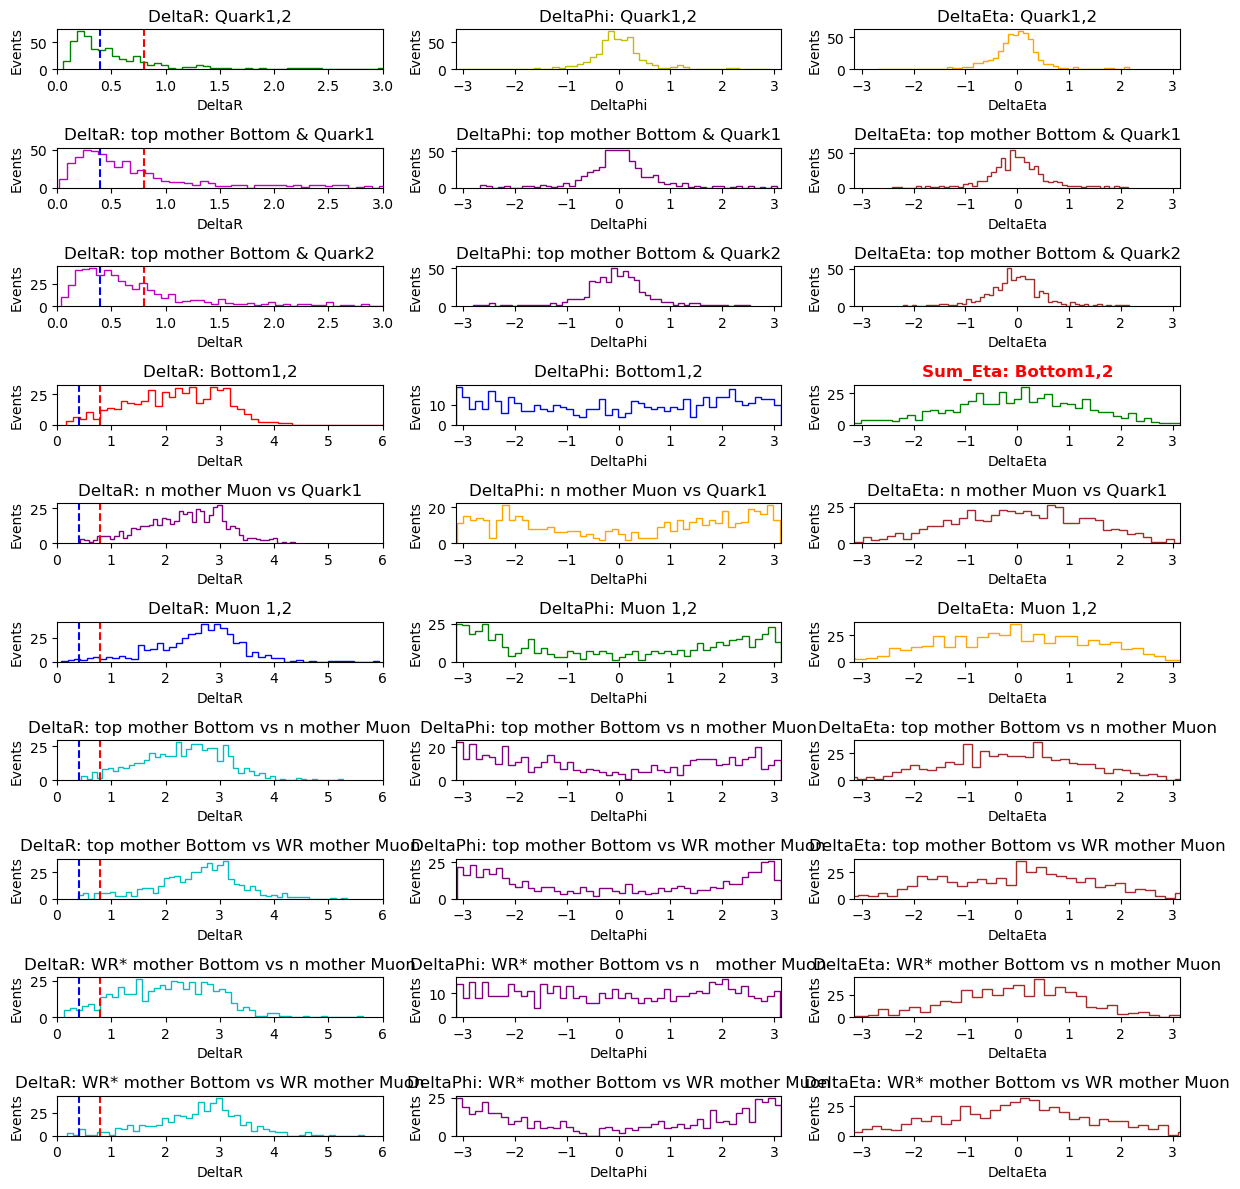

In [15]:
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()


lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()
lhe_mass = events["LHEPart_mass"].array()
lhe_status = events["LHEPart_status"].array()


#muon case
## WL b delta r 
muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)
WL_mask = (lhe_pdgid == 24) | (lhe_pdgid == -24)
bottom_mask = (lhe_pdgid == 5) | (lhe_pdgid == -5)
quark_mask = ((abs(lhe_pdgid) == 1) | (abs(lhe_pdgid) == 2) | (abs(lhe_pdgid) == 3) | (abs(lhe_pdgid) == 4))& (lhe_status == 1)

muon_eta = lhe_eta[muon_mask]
muon_phi = lhe_phi[muon_mask]
muon_pt = lhe_pt[muon_mask]
print(len(lhe_pdgid))
WL_eta = lhe_eta[WL_mask]
WL_phi = lhe_phi[WL_mask]

bottom_eta = lhe_eta[bottom_mask]
bottom_phi = lhe_phi[bottom_mask]
bottom_pt = lhe_pt[bottom_mask]

quark_eta = lhe_eta[quark_mask]
quark_phi = lhe_phi[quark_mask]
quark_pt = lhe_pt[quark_mask]

# 빈 행렬 
eta = np.zeros_like(WL_eta)
phi = np.zeros_like(WL_phi)
deltar = np.zeros_like(WL_eta)


###delta r function
# delta_r 함수 수정

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_eta(eta1, eta2):
    return eta1 - eta2

def sum_eta(eta1, eta2):
    return eta1 + eta2

def delta_r(eta1, phi1, eta2, phi2):
    d_eta = eta1 - eta2
    d_phi = delta_phi(phi1, phi2)
    return np.sqrt(d_eta**2 + d_phi**2)

#lepton , muon 1 = WR mother
#lepton , muon 2 = n mother
#bottom quark 1 = WR* mother
#bottom quark 2 = t mother  

twoquark_deltar = delta_r(quark_eta[:,0], quark_phi[:,0], quark_eta[:,1], quark_phi[:,1])
twoquark_delta_phi = delta_phi(quark_phi[:,0], quark_phi[:,1])
twoquark_delta_eta = delta_eta(quark_eta[:,0], quark_eta[:,1])

bottomandquark1_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], quark_eta[:,0], quark_phi[:,0])
bottomandquark1_delta_phi = delta_phi(bottom_phi[:,0], quark_phi[:,0])
bottomandquark1_delta_eta = delta_eta(bottom_eta[:,0], quark_eta[:,0])

bottomandquark2_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], quark_eta[:,1], quark_phi[:,1])
bottomandquark2_delta_phi = delta_phi(bottom_phi[:,0], quark_phi[:,1])
bottomandquark2_delta_eta = delta_eta(bottom_eta[:,0], quark_eta[:,1])

bottomquark_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], bottom_eta[:,1], bottom_phi[:,1])
bottomquark_delta_phi = delta_phi(bottom_phi[:,0], bottom_phi[:,1])
bottomquark_delta_eta = sum_eta(bottom_eta[:,0], bottom_eta[:,1])

nlepton_quark_deltar = delta_r(muon_eta[:,0], muon_phi[:,0], quark_eta[:,0], quark_phi[:,0])
nlepton_quark_delta_phi = delta_phi(muon_phi[:,0], quark_phi[:,0])
nlepton_quark_delta_eta = delta_eta(muon_eta[:,0], quark_eta[:,0])

lepton12_delta_phi = delta_phi(muon_phi[:,0], muon_phi[:,1])
lepton12_delta_eta = delta_eta(muon_eta[:,0], muon_eta[:,1])
lepton12_deltar = delta_r(muon_eta[:,0], muon_phi[:,0], muon_eta[:,1], muon_phi[:,1])

Topbottom_Nlepton_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], muon_eta[:,0], muon_phi[:,0])
Topbottom_Nlepton_delta_phi = delta_phi(bottom_phi[:,0], muon_phi[:,0])
Topbottom_Nlepton_delta_eta = delta_eta(bottom_eta[:,0], muon_eta[:,0])

Topbottom_WRlepton_deltar = delta_r(bottom_eta[:,0], bottom_phi[:,0], muon_eta[:,1], muon_phi[:,1])
Topbottom_WRlepton_delta_phi = delta_phi(bottom_phi[:,0], muon_phi[:,1])
Topbottom_WRlepton_delta_eta = delta_eta(bottom_eta[:,0], muon_eta[:,1])

WRbottom_Nlepton_deltar = delta_r(bottom_eta[:,1], bottom_phi[:,1], muon_eta[:,0], muon_phi[:,0])
WRbottom_Nlepton_delta_phi = delta_phi(bottom_phi[:,1], muon_phi[:,0])
WRbottom_Nlepton_delta_eta = delta_eta(bottom_eta[:,1], muon_eta[:,0])

WRbottom_WRlepton_deltar = delta_r(bottom_eta[:,1], bottom_phi[:,1], muon_eta[:,1], muon_phi[:,1])
WRbottom_WRlepton_delta_phi = delta_phi(bottom_phi[:,1], muon_phi[:,1])
WRbottom_WRlepton_delta_eta = delta_eta(bottom_eta[:,1], muon_eta[:,1])




muonpt1 = muon_pt[:, 0]#muon 0 =  n mother
muonpt2 = muon_pt[:, 1]# muon 1 = WR mother
bottompt1 = bottom_pt[:, 0]#bottom quark 0 = top mother
bottompt2 = bottom_pt[:, 1]#bottom quark 1 = WR* mother
a=np.sort(muonpt1)
b=np.sort(muonpt2)
muonptratio = muonpt2 / muonpt1
bottomptratio = bottompt2 / bottompt1
print("Muon pt ratio :", muonptratio)
print("Bottom pt ratio :", bottomptratio)
print("Muon n mother pt :", a)
print("Muon WR mother pt :", b)



fig, axs = plt.subplots(10, 3, figsize=(12, 12))
axs[0, 0].hist(ak.to_numpy(twoquark_deltar), bins=50, histtype='step', color='g')
axs[0, 0].set_title('DeltaR: Quark1,2')
axs[0, 0].axvline(0.4, color='b', linestyle='--')
axs[0, 0].axvline(0.8, color='r', linestyle='--')
axs[0, 0].set_xlim(0,3)
axs[0, 0].set_xlabel('DeltaR')
axs[0, 0].set_ylabel('Events')

axs[0, 1].hist(ak.to_numpy(twoquark_delta_phi), bins=50, histtype='step', color='y')
axs[0, 1].set_title('DeltaPhi: Quark1,2')
axs[0, 1].set_xlim(-3.14, 3.14)
axs[0, 1].set_xlabel('DeltaPhi')
axs[0, 1].set_ylabel('Events')

axs[0, 2].hist(ak.to_numpy(twoquark_delta_eta), bins=50, histtype='step', color='orange')
axs[0, 2].set_title('DeltaEta: Quark1,2')
axs[0, 2].set_xlim(-3.14, 3.14)
axs[0, 2].set_xlabel('DeltaEta')
axs[0, 2].set_ylabel('Events')

axs[1, 0].hist(ak.to_numpy(bottomandquark1_deltar), bins=50, histtype='step', color='m')
axs[1, 0].set_title('DeltaR: top mother Bottom & Quark1')
axs[1, 0].axvline(0.4, color='b', linestyle='--')
axs[1, 0].axvline(0.8, color='r', linestyle='--')
axs[1, 0].set_xlim(0, 3)
axs[1, 0].set_xlabel('DeltaR')
axs[1, 0].set_ylabel('Events')

axs[1, 1].hist(ak.to_numpy(bottomandquark1_delta_phi), bins=50, histtype='step', color='purple')
axs[1, 1].set_title('DeltaPhi: top mother Bottom & Quark1')
axs[1, 1].set_xlim(-3.14, 3.14)
axs[1, 1].set_xlabel('DeltaPhi')
axs[1, 1].set_ylabel('Events')

axs[1, 2].hist(ak.to_numpy(bottomandquark1_delta_eta), bins=50, histtype='step', color='brown')
axs[1, 2].set_title('DeltaEta: top mother Bottom & Quark1')
axs[1, 2].set_xlim(-3.14, 3.14)
axs[1, 2].set_xlabel('DeltaEta')
axs[1, 2].set_ylabel('Events')

axs[2, 0].hist(ak.to_numpy(bottomandquark2_deltar), bins=50, histtype='step', color='m')
axs[2, 0].set_title('DeltaR: top mother Bottom & Quark2')
axs[2, 0].axvline(0.4, color='b', linestyle='--')
axs[2, 0].axvline(0.8, color='r', linestyle='--')
axs[2, 0].set_xlim(0, 3)
axs[2, 0].set_xlabel('DeltaR')
axs[2, 0].set_ylabel('Events')

axs[2, 1].hist(ak.to_numpy(bottomandquark2_delta_phi), bins=50, histtype='step', color='purple')
axs[2, 1].set_title('DeltaPhi: top mother Bottom & Quark2')
axs[2, 1].set_xlim(-3.14, 3.14)
axs[2, 1].set_xlabel('DeltaPhi')
axs[2, 1].set_ylabel('Events')

axs[2, 2].hist(ak.to_numpy(bottomandquark2_delta_eta), bins=50, histtype='step', color='brown')
axs[2, 2].set_title('DeltaEta: top mother Bottom & Quark2')
axs[2, 2].set_xlim(-3.14, 3.14)
axs[2, 2].set_xlabel('DeltaEta')
axs[2, 2].set_ylabel('Events')

axs[3, 0].hist(ak.to_numpy(bottomquark_deltar), bins=50, histtype='step', color='r')
axs[3, 0].set_title('DeltaR: Bottom1,2')
axs[3, 0].set_xlim(0, 6)
axs[3, 0].axvline(0.4, color='b', linestyle='--')
axs[3, 0].axvline(0.8, color='r', linestyle='--')
axs[3, 0].set_xlim(0, 6)
axs[3, 0].set_xlabel('DeltaR')
axs[3, 0].set_ylabel('Events')  

axs[3, 1].hist(ak.to_numpy(bottomquark_delta_phi), bins=50, histtype='step', color='blue')
axs[3, 1].set_title('DeltaPhi: Bottom1,2')
axs[3, 1].set_xlim(-3.14, 3.14)
axs[3, 1].set_xlabel('DeltaPhi')
axs[3, 1].set_ylabel('Events')

axs[3, 2].hist(ak.to_numpy(bottomquark_delta_eta), bins=50, histtype='step', color='green')
axs[3, 2].set_title('Sum_Eta: Bottom1,2', color='red', fontweight='bold') ## delta eta는 z축에 멀어진 정도에 따라 다양한 값이 나오니 합해서 0에 가까우면 서로 반대 방향으로 나간게 많고 , 같은 방향이면 더했을때 0에 먼게 많아짐.
# 사실 더 정확하게 하려면 eta가 0에 가까운건 아얘 목록에서 빼서 갯수 세고 , 0에서 좀 떨어진것들에 대해서 sum_eta값이 더 정확해질 듯 . 
axs[3, 2].set_xlim(-3.14, 3.14)
axs[3, 2].set_xlabel('DeltaEta')
axs[3, 2].set_ylabel('Events')

axs[4, 0].hist(ak.to_numpy(nlepton_quark_deltar), bins=50, histtype='step', color='purple')
axs[4, 0].set_title('DeltaR: n mother Muon vs Quark1')
axs[4, 0].set_xlim(0, 6)
axs[4, 0].axvline(0.4, color='b', linestyle='--')
axs[4, 0].axvline(0.8, color='r', linestyle='--')
axs[4, 0].set_xlabel('DeltaR')
axs[4, 0].set_ylabel('Events')

axs[4, 1].hist(ak.to_numpy(nlepton_quark_delta_phi), bins=50, histtype='step', color='orange')
axs[4, 1].set_title('DeltaPhi: n mother Muon vs Quark1')
axs[4, 1].set_xlim(-3.14, 3.14)
axs[4, 1].set_xlabel('DeltaPhi')
axs[4, 1].set_ylabel('Events')  

axs[4, 2].hist(ak.to_numpy(nlepton_quark_delta_eta), bins=50, histtype='step', color='brown')
axs[4, 2].set_title('DeltaEta: n mother Muon vs Quark1')
axs[4, 2].set_xlim(-3.14, 3.14)
axs[4, 2].set_xlabel('DeltaEta')
axs[4, 2].set_ylabel('Events')  

axs[5, 0].hist(ak.to_numpy(lepton12_deltar), bins=50, histtype='step', color='b')
axs[5, 0].set_title('DeltaR: Muon 1,2')
axs[5, 0].axvline(0.4, color='b', linestyle='--')
axs[5, 0].axvline(0.8, color='r', linestyle='--')
axs[5, 0].set_xlim(0, 6)
axs[5, 0].set_xlabel('DeltaR')
axs[5, 0].set_ylabel('Events')  

axs[5, 1].hist(ak.to_numpy(lepton12_delta_phi), bins=50, histtype='step', color='green')
axs[5, 1].set_title('DeltaPhi: Muon 1,2')
axs[5, 1].set_xlim(-3.14, 3.14)
axs[5, 1].set_xlabel('DeltaPhi')        
axs[5, 1].set_ylabel('Events')

axs[5, 2].hist(ak.to_numpy(lepton12_delta_eta), bins=50, histtype='step', color='orange')
axs[5, 2].set_title('DeltaEta: Muon 1,2')
axs[5, 2].set_xlim(-3.14, 3.14)         
axs[5, 2].set_xlabel('DeltaEta')
axs[5, 2].set_ylabel('Events')

axs[6, 0].hist(ak.to_numpy(Topbottom_Nlepton_deltar), bins=50, histtype='step', color='c')
axs[6, 0].set_title('DeltaR: top mother Bottom vs n mother Muon')
axs[6, 0].axvline(0.4, color='b', linestyle='--')
axs[6, 0].axvline(0.8, color='r', linestyle='--')
axs[6, 0].set_xlim(0, 6)
axs[6, 0].set_xlabel('DeltaR')
axs[6, 0].set_ylabel('Events')  

axs[6, 1].hist(ak.to_numpy(Topbottom_Nlepton_delta_phi), bins=50, histtype='step', color='purple')
axs[6, 1].set_title('DeltaPhi: top mother Bottom vs n mother Muon')
axs[6, 1].set_xlim(-3.14, 3.14)
axs[6, 1].set_xlabel('DeltaPhi')
axs[6, 1].set_ylabel('Events')      

axs[6, 2].hist(ak.to_numpy(Topbottom_Nlepton_delta_eta), bins=50, histtype='step', color='brown')
axs[6, 2].set_title('DeltaEta: top mother Bottom vs n mother Muon')
axs[6, 2].set_xlim(-3.14, 3.14)
axs[6, 2].set_xlabel('DeltaEta')
axs[6, 2].set_ylabel('Events')  

axs[7, 0].hist(ak.to_numpy(Topbottom_WRlepton_deltar), bins=50, histtype='step', color='c')
axs[7, 0].set_title('DeltaR: top mother Bottom vs WR mother Muon')
axs[7, 0].axvline(0.4, color='b', linestyle='--')
axs[7, 0].axvline(0.8, color='r', linestyle='--')
axs[7, 0].set_xlim(0, 6)            
axs[7, 0].set_xlabel('DeltaR')
axs[7, 0].set_ylabel('Events')

axs[7, 1].hist(ak.to_numpy(Topbottom_WRlepton_delta_phi), bins=50, histtype='step', color='purple')
axs[7, 1].set_title('DeltaPhi: top mother Bottom vs WR mother Muon')
axs[7, 1].set_xlim(-3.14, 3.14)
axs[7, 1].set_xlabel('DeltaPhi')
axs[7, 1].set_ylabel('Events')  

axs[7, 2].hist(ak.to_numpy(Topbottom_WRlepton_delta_eta), bins=50, histtype='step', color='brown')
axs[7, 2].set_title('DeltaEta: top mother Bottom vs WR mother Muon')
axs[7, 2].set_xlim(-3.14, 3.14)
axs[7, 2].set_xlabel('DeltaEta')
axs[7, 2].set_ylabel('Events')

axs[8, 0].hist(ak.to_numpy(WRbottom_Nlepton_deltar), bins=50, histtype='step', color='c')
axs[8, 0].set_title('DeltaR: WR* mother Bottom vs n mother Muon')
axs[8, 0].axvline(0.4, color='b', linestyle='--')
axs[8, 0].axvline(0.8, color='r', linestyle='--')
axs[8, 0].set_xlim(0, 6)
axs[8, 0].set_xlabel('DeltaR')
axs[8, 0].set_ylabel('Events')  

axs[8, 1].hist(ak.to_numpy(WRbottom_Nlepton_delta_phi), bins=50, histtype='step', color='purple')
axs[8, 1].set_title('DeltaPhi: WR* mother Bottom vs n   mother Muon')   
axs[8, 1].set_xlim(-3.14, 3.14)
axs[8, 1].set_xlabel('DeltaPhi')
axs[8, 1].set_ylabel('Events')  


axs[8, 2].hist(ak.to_numpy(WRbottom_Nlepton_delta_eta), bins=50, histtype='step', color='brown')
axs[8, 2].set_title('DeltaEta: WR* mother Bottom vs n mother Muon')
axs[8, 2].set_xlim(-3.14, 3.14)
axs[8, 2].set_xlabel('DeltaEta')        
axs[8, 2].set_ylabel('Events')

axs[9, 0].hist(ak.to_numpy(WRbottom_WRlepton_deltar), bins=50, histtype='step', color='c')
axs[9, 0].set_title('DeltaR: WR* mother Bottom vs WR mother Muon')
axs[9, 0].axvline(0.4, color='b', linestyle='--')
axs[9, 0].axvline(0.8, color='r', linestyle='--')
axs[9, 0].set_xlim(0, 6)
axs[9, 0].set_xlabel('DeltaR')
axs[9, 0].set_ylabel('Events')  

axs[9, 1].hist(ak.to_numpy(WRbottom_WRlepton_delta_phi), bins=50, histtype='step', color='purple')
axs[9, 1].set_title('DeltaPhi: WR* mother Bottom vs WR mother Muon')
axs[9, 1].set_xlim(-3.14, 3.14)
axs[9, 1].set_xlabel('DeltaPhi')
axs[9, 1].set_ylabel('Events')

axs[9, 2].hist(ak.to_numpy(WRbottom_WRlepton_delta_eta), bins=50, histtype='step', color='brown')
axs[9, 2].set_title('DeltaEta: WR* mother Bottom vs WR mother Muon')
axs[9, 2].set_xlim(-3.14, 3.14)
axs[9, 2].set_xlabel('DeltaEta')    
axs[9, 2].set_ylabel('Events')







plt.tight_layout()
plt.show()



## N,WR mass reco

[-1, 2, -24, -13, 3, -4, -5, 5, -13]


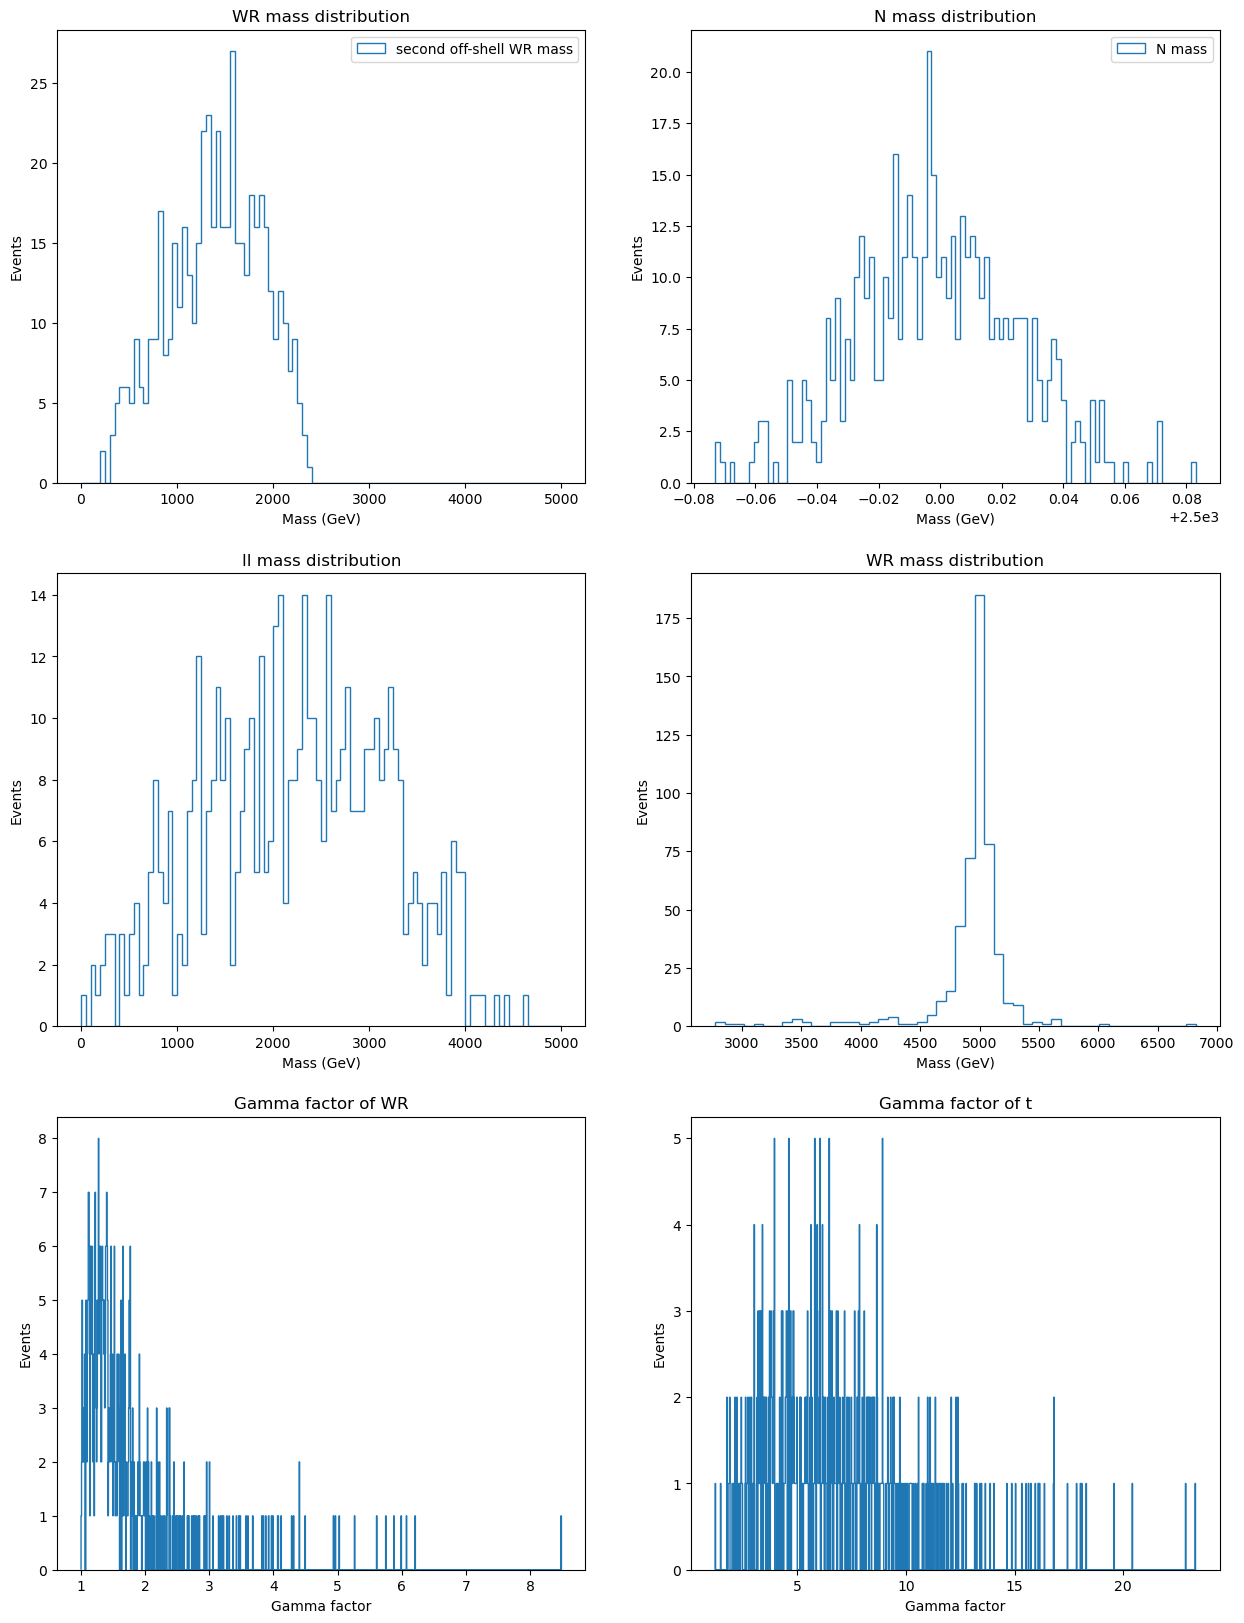

In [22]:
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

sample = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()


lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()
lhe_mass = events["LHEPart_mass"].array()
lhe_status = events["LHEPart_status"].array()


#muon case
## WL b delta r 
muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)
electron_mask = (lhe_pdgid == 11) | (lhe_pdgid == -11)
WL_mask = (lhe_pdgid == 24) | (lhe_pdgid == -24)
bottom_mask = (lhe_pdgid == 5) | (lhe_pdgid == -5)
quark_mask = ((abs(lhe_pdgid) == 1) | (abs(lhe_pdgid) == 2) | (abs(lhe_pdgid) == 3) | (abs(lhe_pdgid) == 4))& (lhe_status == 1)

muon_eta = lhe_eta[muon_mask]
muon_phi = lhe_phi[muon_mask]
muon_pt = lhe_pt[muon_mask]
muon_mass = lhe_mass[muon_mask]

WL_eta = lhe_eta[WL_mask]
WL_phi = lhe_phi[WL_mask]
WL_mass = lhe_mass[WL_mask]

bottom_eta = lhe_eta[bottom_mask]
bottom_phi = lhe_phi[bottom_mask]
bottom_pt = lhe_pt[bottom_mask]
bottom_mass = lhe_mass[bottom_mask]

quark_eta = lhe_eta[quark_mask]
quark_phi = lhe_phi[quark_mask]
quark_pt = lhe_pt[quark_mask]
quark_mass = lhe_mass[quark_mask]

# N mass reco 

quark1 =vector.array({"pt": quark_pt[:, 0], "eta": quark_eta[:, 0], "phi": quark_phi[:, 0], "mass": quark_mass[:, 0]})
quark2 = vector.array({"pt": quark_pt[:, 1], "eta": quark_eta[:, 1], "phi": quark_phi[:, 1], "mass": quark_mass[:, 1]})
bottom1 = vector.array({"pt": bottom_pt[:, 0], "eta": bottom_eta[:, 0], "phi": bottom_phi[:, 0], "mass": bottom_mass[:, 0]})
bottom2 = vector.array({"pt": bottom_pt[:, 1], "eta": bottom_eta[:, 1], "phi": bottom_phi[:, 1], "mass": bottom_mass[:, 1]})
muon1 = vector.array({"pt": muon_pt[:, 0], "eta": muon_eta[:, 0], "phi": muon_phi[:, 0], "mass": muon_mass[:, 0]})
muon2 = vector.array({"pt": muon_pt[:, 1], "eta": muon_eta[:, 1], "phi": muon_phi[:, 1], "mass": muon_mass[:, 1]})

m_N = (quark1 + quark2 + bottom1 + bottom2 + muon1).mass
m_WR = (muon1 + muon2 + quark1 + quark2 + bottom1 + bottom2).mass
m_offWR = (quark1 + quark2 + bottom1 + bottom2).mass
E_offWR = (quark1 + quark2 + bottom1 + bottom2).E
m_ll = (muon1 + muon2).mass
m_t = (bottom1+ quark1 + quark2).mass
E_t = (bottom1 + quark1 + quark2).E
gamma_offWR = E_offWR / m_offWR
gamma_t = E_t / m_t

fig, axs = plt.subplots(3, 2, figsize=(15, 20))
axs[0,1].hist(ak.to_numpy(m_N), bins=100,  histtype='step', label='N mass')
axs[0,1].set_title('N mass distribution')
axs[0,1].set_xlabel('Mass (GeV)')
axs[0,1].set_ylabel('Events')
axs[0,0].hist(ak.to_numpy(m_offWR), bins=100, range=(0, 5000), histtype='step', label='second off-shell WR mass')

axs[0,0].set_title('WR mass distribution')
axs[0,0].set_xlabel('Mass (GeV)')
axs[0,0].set_ylabel('Events')
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].hist(ak.to_numpy(m_ll), bins=100, range=(0, 5000), histtype='step', label='ll mass')
axs[1,0].set_title('ll mass distribution')
axs[1,0].set_xlabel('Mass (GeV)')
axs[1,0].set_ylabel('Events')
#axs[1,1].hist(ak.to_numpy(m_t), bins=100, range=(150, 200), histtype='step', label='t mass')
#axs[1,1].set_title('t mass distribution')
#axs[1,1].set_xlabel('Mass (GeV)')
axs[1,1].hist(ak.to_numpy(m_WR), bins=50, histtype='step', label='WR mass')
axs[1,1].set_title('WR mass distribution')
axs[1,1].set_xlabel('Mass (GeV)')
axs[1,1].set_ylabel('Events')
axs[2,0].hist(ak.to_numpy(gamma_offWR), bins=1000,  histtype='step', label='Gamma factor of WR')
axs[2,0].set_title('Gamma factor of WR')
axs[2,0].set_xlabel('Gamma factor')
axs[2,0].set_ylabel('Events')
axs[2,1].hist(ak.to_numpy(gamma_t), bins=1000,  histtype='step', label='Gamma factor of t')
axs[2,1].set_title('Gamma factor of t')
axs[2,1].set_xlabel('Gamma factor')
axs[2,1].set_ylabel('Events')


print(lhe_pdgid[5])

#Drell yan process gamma factor

/data6/Users/snuintern1/with_Jin/gen_0411_DY_3J_madgraph_3.5.9/genproductions/bin/MadGraph5_aMCatNLO/0412xseccheck_0/result/events.lhe"

WARNING. Parse Error: not well-formed (invalid token): line 1075, column 174
0 events with Z boson found.


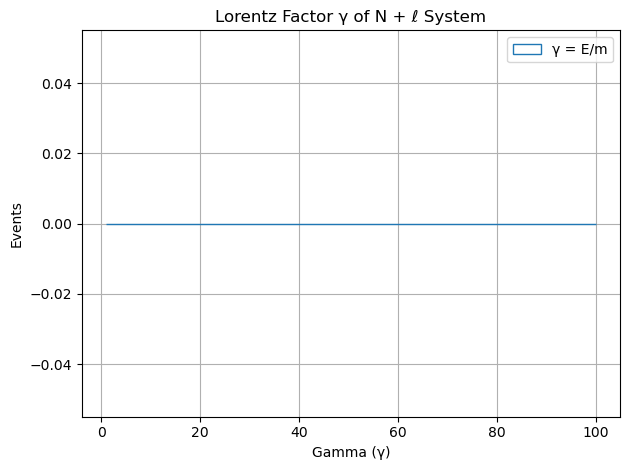

In [14]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt

def get_fourvec(p):
    return {
        "E": p.e,
        "px": p.px,
        "py": p.py,
        "pz": p.pz,
    }

def combine(p1, p2):
    return {
        "E": p1["E"] + p2["E"],
        "px": p1["px"] + p2["px"],
        "py": p1["py"] + p2["py"],
        "pz": p1["pz"] + p2["pz"],
    }

def mass(p):
    m2 = p["E"]**2 - p["px"]**2 - p["py"]**2 - p["pz"]**2
    return np.sqrt(m2) if m2 > 0 else 0

def gamma(p):
    m = mass(p)
    return p["E"] / m if m > 0 else 0

lhe_file = "/data6/Users/snuintern1/with_Jin/gen_0411_DY_3J_madgraph_3.5.9/genproductions/bin/MadGraph5_aMCatNLO/0412xseccheck_0/result/events.lhe"

gamma_list = []

for event in pylhe.read_lhe_with_attributes(lhe_file):
    particles = event.particles
    z = next((p for p in particles if abs(p.id) == 23), None)
    print("Z boson found:", z is not None)

    if z :
        vec_z = get_fourvec(z)
        gamma_list.append(gamma(vec_z))

print(len(gamma_list), "events with Z boson found.")
# 감마 분포 시각화
plt.hist(gamma_list, bins=50, range=(1, 100), histtype='step', label='γ = E/m')
plt.xlabel("Gamma (γ)")
plt.ylabel("Events")
plt.title("Lorentz Factor γ of N + ℓ System")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
